# Concrete Compressive Strength Data Predicion with Regression

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats 
import sklearn 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv("Concretedataset.csv")

In [3]:
df.describe()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [4]:
df.skew()

Cement              0.509481
Blast               0.800717
Fly Ash             0.537354
Water               0.074628
Superplasticizer    0.907203
CA                 -0.040220
FA                 -0.253010
Age                 3.269177
CMS                 0.416977
dtype: float64

In [5]:
df.corr()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
CA,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
FA,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
CMS,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


<AxesSubplot:>

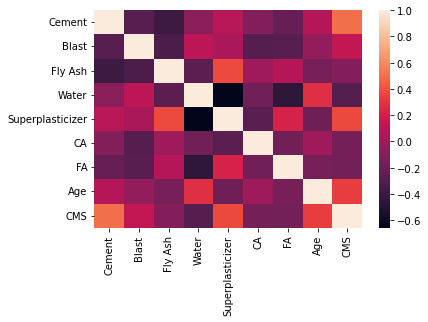

In [6]:
sns.heatmap(df.corr())

{'whiskers': [<matplotlib.lines.Line2D at 0x22d87f128e0>,
 'caps': [<matplotlib.lines.Line2D at 0x22d87f21040>,
 'boxes': [<matplotlib.lines.Line2D at 0x22d87f12550>],
 'medians': [<matplotlib.lines.Line2D at 0x22d87f21760>],
 'fliers': [<matplotlib.lines.Line2D at 0x22d87f21af0>],
 'means': []}

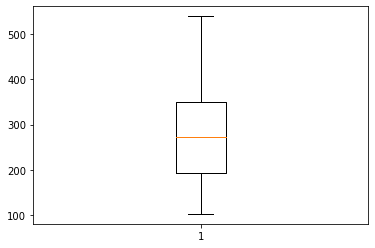

In [10]:
plt.boxplot(df['Cement'])

{'whiskers': [<matplotlib.lines.Line2D at 0x22d87f71d90>,
 'caps': [<matplotlib.lines.Line2D at 0x22d87f814f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22d87f71a00>],
 'medians': [<matplotlib.lines.Line2D at 0x22d87f81c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x22d87f81fa0>],
 'means': []}

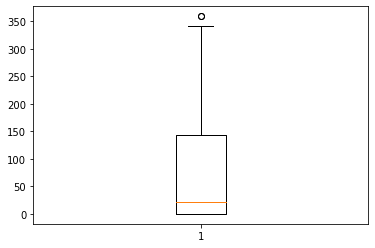

In [11]:
plt.boxplot(df['Blast'])

In [14]:
#To remove the skewness from the variables, we can use BOXCOX from scipy.stats. 
from scipy.stats import boxcox 
df['Blast'] = boxcox(df['Cement'],0)

{'whiskers': [<matplotlib.lines.Line2D at 0x22d88035220>,
 'caps': [<matplotlib.lines.Line2D at 0x22d88035940>,
 'boxes': [<matplotlib.lines.Line2D at 0x22d88023e50>],
 'medians': [<matplotlib.lines.Line2D at 0x22d880420a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22d88042430>],
 'means': []}

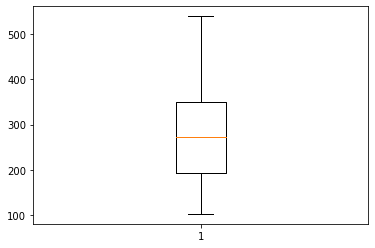

In [15]:
plt.boxplot(df['Cement'])

In [16]:
df.isnull().sum()

Cement              0
Blast               0
Fly Ash             0
Water               0
Superplasticizer    0
CA                  0
FA                  0
Age                 0
CMS                 0
dtype: int64

In [18]:
#Checking the zscore. 
from scipy.stats import zscore 
z = zscore(df)

In [19]:
df_new = df[(z<3).all(axis=1)]

In [20]:
df_new.shape

(985, 9)

In [21]:
df.shape

(1030, 9)

In [23]:
df = df_new

In [24]:
df.describe()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,277.311980,5.555575,56.519289,180.780102,6.169340,974.623553,775.570660,36.371574,35.279299
std,102.424611,0.377899,64.409380,20.101125,5.489476,77.625771,77.791337,36.821891,16.708623
min,102.000000,4.624973,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,5.250702,0.000000,164.900000,0.000000,932.000000,736.600000,7.000000,23.220000
50%,264.500000,5.577841,0.000000,184.000000,6.700000,968.000000,780.000000,28.000000,33.690000
75%,349.000000,5.855072,118.300000,192.000000,10.200000,1033.000000,822.200000,28.000000,45.300000
max,540.000000,6.291569,200.100000,237.000000,23.400000,1145.000000,992.600000,180.000000,82.600000


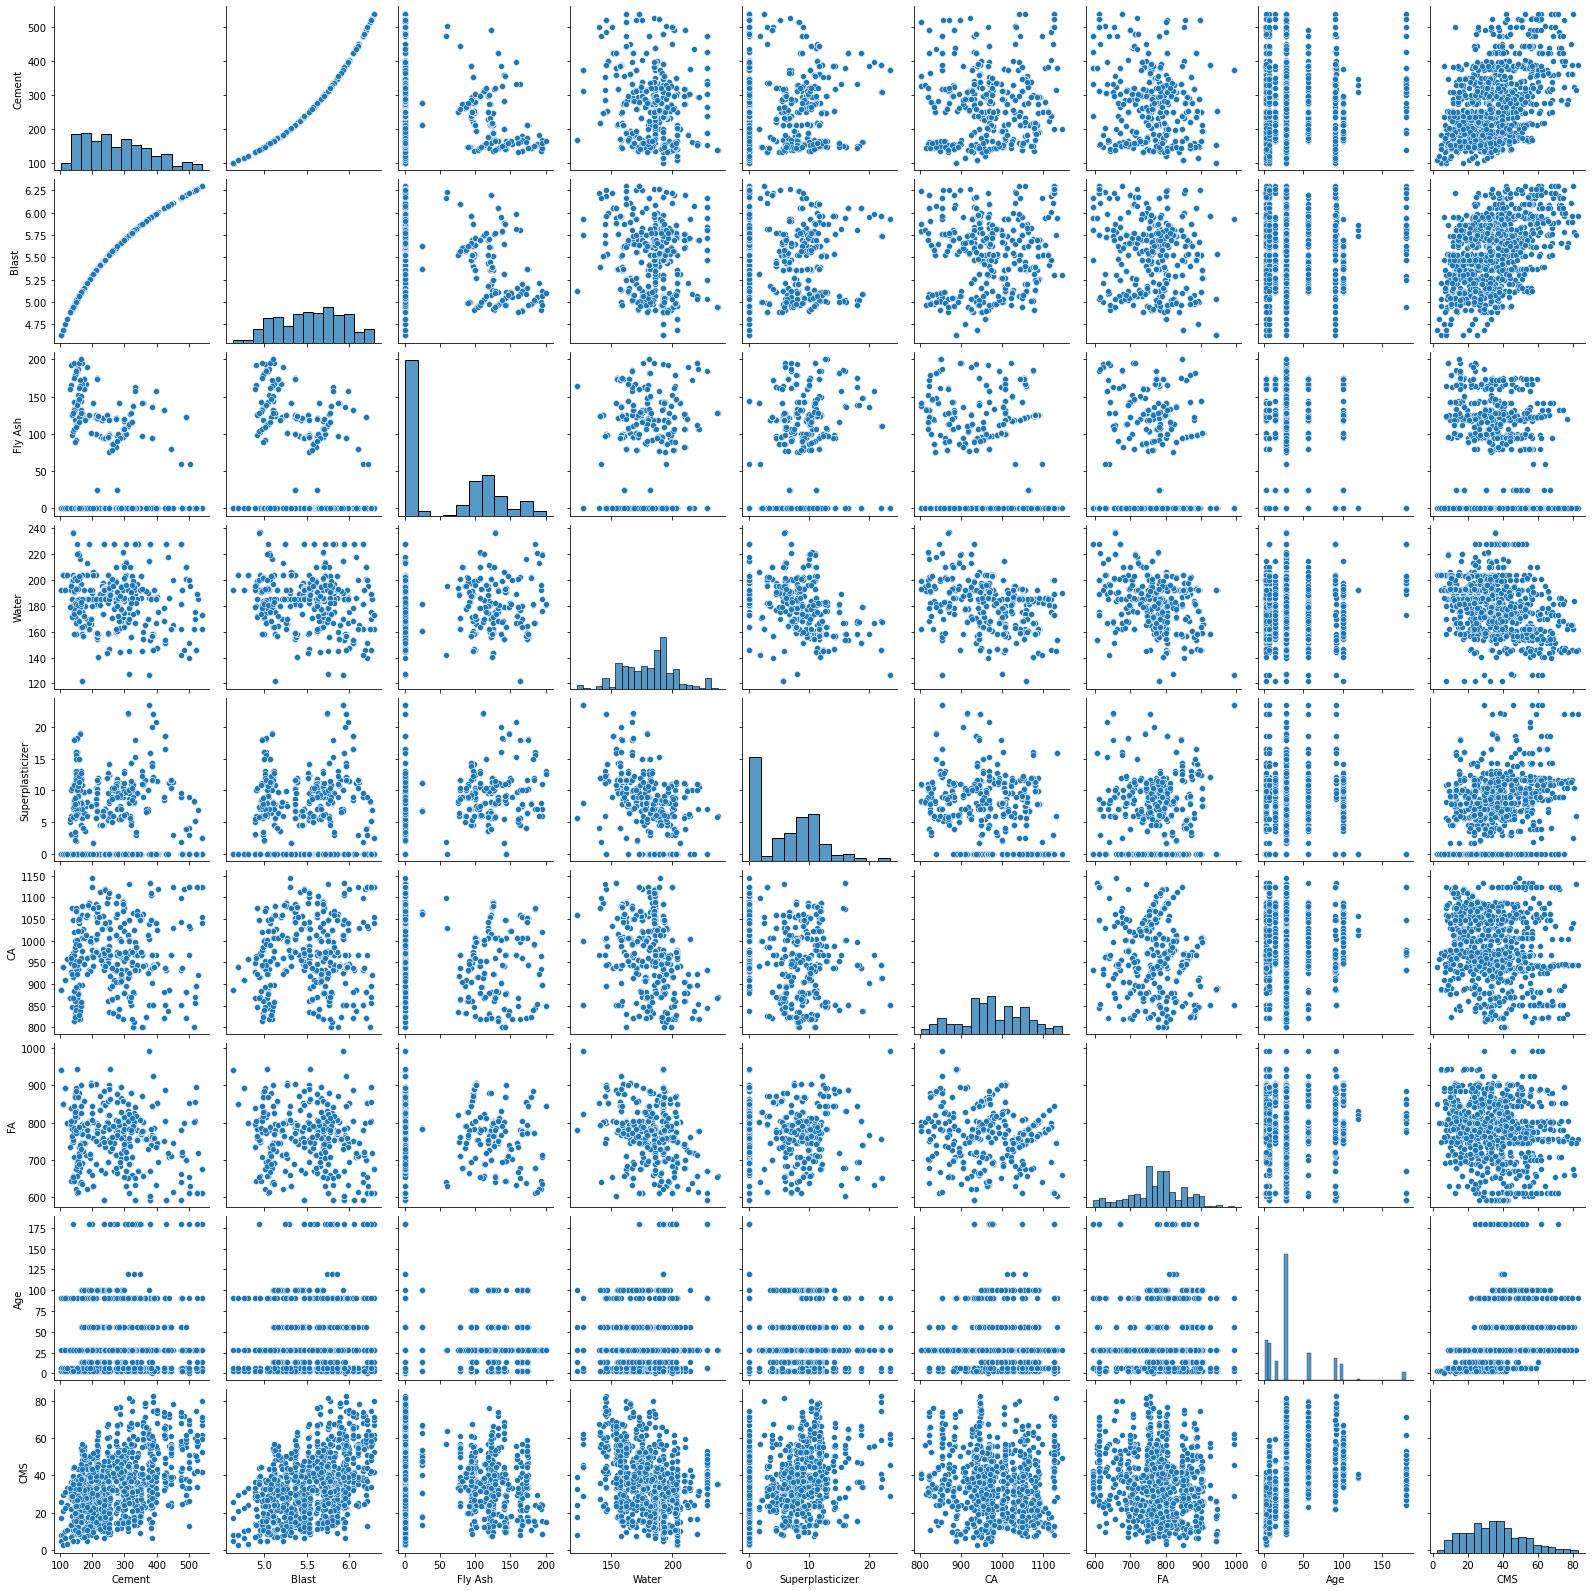

In [25]:
sns.pairplot(df)

In [26]:
x = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .45, random_state = 30)

In [28]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [45]:
lr.coef_

array([-3.58629998e-03,  1.23944201e+01, -2.42715530e-02, -4.38388768e-01,
        2.43098807e-01, -6.36038184e-02, -7.99563623e-02,  2.37789589e-01])

In [29]:
lr.score(x_train, y_train)

0.655485440655943

In [30]:
pred = lr.predict(x_test)

In [31]:
mean_absolute_error(y_test, pred)

7.329185064958365

In [32]:
mean_squared_error(y_test, pred)

97.5300448956798

In [33]:
r2_score(y_test, pred)

0.6787541956032133

In [41]:
#Trying to minimize the coefficents. 

ls = Lasso(alpha = 0.001)

In [42]:
ls.fit(x_train, y_train)
ls.score(x_train, y_train)

0.6554846747150462

In [43]:
ls.predict(x_test)

array([18.33304994, 40.63014247, 35.43156626, 44.85064805, 30.21426247,
       39.84093563, 28.5930646 , 41.58369691, 14.87551988, 47.72365492,
       57.00047139, 23.53638527, 45.33295702, 20.54305707, 52.74798889,
       37.60834822, 36.78774789, 25.1403452 , 28.51794803, 25.58397274,
       34.94510691, 45.44833202, 28.21806052, 23.65715936, 57.35828063,
       45.33295702, 30.23438095, 35.59376276, 21.78367487, 39.30997732,
       22.0981264 , 25.12761364, 34.10580377, 39.31853095, 44.94244122,
       34.04471333, 33.10723047, 47.55796375, 31.87858356, 32.88343833,
       65.68141528, 49.78190023, 33.69373773, 39.50514461, 31.92475544,
       44.91447999, 26.95698034, 57.27821945, 22.42007234, 30.31309597,
       54.04811263, 57.18701059, 22.25151163, 42.21024447, 56.98534553,
       44.1438775 , 48.25331052, 18.93005198, 42.09007398, 24.43539124,
       31.55512134, 51.25844356, 42.77697063, 30.53109526, 24.22667361,
       17.51100002, 46.08948117, 32.47803945, 22.89567675, 21.86

In [44]:
mean_absolute_error(y_test, ls.predict(x_test))

7.328134511089026